In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [143]:
df = pd.read_csv("data/df_july.csv")

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754466 entries, 0 to 1754465
Data columns (total 26 columns):
city                           object
bar_id                         int64
order_id                       int64
order_time                     object
order_item_id                  int64
title                          object
category_id                    float64
beer_brand_id                  int64
beer_serving_type_id           int64
beer_volume                    float64
item_qty                       float64
sales_before_tax               float64
sales_inc_tax                  float64
guest_count                    int64
waiter_id                      float64
country                        object
country_id                     int64
state                          object
state_id                       int64
timezone                       object
bar_type_id                    int64
status                         int64
last_status                    int64
is_bulk           

In [146]:
df.drop("country",axis=1,inplace=True) # only single country, no need
df = df[df["bar_type"]!= "Night Club"] # only 83 rows from Night Club 
df.drop(["data_availability_status_id","is_bulk","status","last_status","state","state_id","waiter_id","country_id"],axis=1,inplace=True) # only single country, no need



In [147]:
df = df[df["city"] == "Toronto"] #choose only Toronto city

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320805 entries, 17 to 1754453
Data columns (total 17 columns):
city                    320805 non-null object
bar_id                  320805 non-null int64
order_id                320805 non-null int64
order_time              320805 non-null object
order_item_id           320805 non-null int64
title                   320805 non-null object
category_id             319148 non-null float64
beer_brand_id           320805 non-null int64
beer_serving_type_id    320805 non-null int64
beer_volume             320804 non-null float64
item_qty                320805 non-null float64
sales_before_tax        320805 non-null float64
sales_inc_tax           320805 non-null float64
guest_count             320805 non-null int64
timezone                320805 non-null object
bar_type_id             320805 non-null int64
bar_type                302498 non-null object
dtypes: float64(5), int64(7), object(5)
memory usage: 44.1+ MB


In [149]:
df.bar_type.value_counts()

Bar/Pub                 136928
Casual Dining           104014
Trendy Restaurant        41707
Restaurant               10891
Restaurante informal      5558
Casual Bar                3400
Name: bar_type, dtype: int64

In [150]:
df[df["category_id"] == 1].bar_type.value_counts() 

Bar/Pub                 29437
Casual Dining           17624
Trendy Restaurant        6812
Restaurant                654
Casual Bar                597
Restaurante informal      346
Name: bar_type, dtype: int64

In [ ]:
#21% of orders in the bar/pub are beers

In [91]:
agg_by_guests = df.groupby(["order_id", "bar_type"]).mean().reset_index()
agg_by_guests.groupby("bar_type").describe()["guest_count"]



,count,mean,std,min,25%,50%,75%,max
bar_type,,,,,,,,
Bar/Pub,31673.0,1.315505,1.575198,0.0,0.0,1.0,2.0,52.0
Casual Bar,708.0,2.257062,1.523607,1.0,1.0,2.0,3.0,16.0
Casual Dining,20576.0,1.186577,1.347384,0.0,0.0,1.0,2.0,40.0
Restaurant,2222.0,1.938794,1.988675,0.0,1.0,2.0,2.0,30.0
Restaurante informal,1159.0,2.044866,1.443725,0.0,1.0,2.0,3.0,14.0
Trendy Restaurant,8514.0,1.133897,1.537631,0.0,0.0,1.0,2.0,57.0


In [102]:
agg_by_guests = df.groupby(["order_id", "bar_type"]).count().reset_index()
agg_by_guests.groupby("bar_type").describe()["item_qty"]




,count,mean,std,min,25%,50%,75%,max
bar_type,,,,,,,,
Bar/Pub,31673.0,4.323177,4.527957,1.0,2.0,3.0,5.0,205.0
Casual Bar,708.0,4.802260,4.116465,1.0,2.0,4.0,6.0,66.0
Casual Dining,20576.0,5.055113,4.618614,1.0,2.0,4.0,6.0,170.0
Restaurant,2222.0,4.901440,4.595057,1.0,2.0,4.0,6.0,66.0
Restaurante informal,1159.0,4.795513,2.886233,1.0,3.0,4.0,6.0,23.0
Trendy Restaurant,8514.0,4.898638,5.346378,1.0,2.0,4.0,6.0,172.0


In [124]:
pub_df = df[df["bar_type"] == "Bar/Pub"]


In [135]:
orders_to_look_at = pub_df[pub_df["guest_count"] == 3].sample(1)["order_id"]


In [137]:
df[df["order_id"].isin(orders_to_look_at)]




,city,bar_id,order_id,order_time,order_item_id,title,category_id,beer_brand_id,beer_serving_type_id,beer_volume,...,country_id,state,state_id,timezone,bar_type_id,status,last_status,is_bulk,bar_type,data_availability_status_id
566092,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622901,STELLA.XL,1.0,44,2,0.591,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566093,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622906,MUSHROOM.NY,2.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566094,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622909,TITO'S*,3.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566095,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622910,b.potato,2.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566096,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622913,STELLA.XL,1.0,44,2,0.591,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566097,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622902,TITO'S*,3.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566098,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622905,LAMBS.RUM*,3.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566099,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622908,PAN.RST.SALMON*,2.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566100,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622907,STELLA.XL,1.0,44,2,0.591,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1
566101,Toronto,16984,648776229,2019-07-16 18:53:00.000,64877622904,SIRLOIN.SALAD,2.0,0,0,0.000,...,195,Ontario,49,America/Toronto,1,12,0,0,Bar/Pub,1


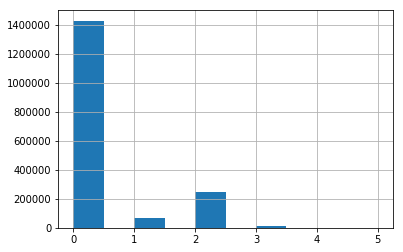

In [144]:
df.beer_serving_type_id.hist()

In [153]:
len(df.order_id.unique())

69143

In [156]:
len(df.groupby(["order_id", "bar_id"]).size())

69143

In [173]:
import random
df[df.guest_count.isin([0,1])].shape

(165696, 17)

In [174]:
random.sample(list(df[df.guest_count.isin([0,1])].order_id.unique()), 20)

[650787215,
 651998706,
 650333616,
 650818052,
 649560864,
 647613485,
 648222217,
 649425742,
 651615952,
 647672113,
 649463242,
 650181148,
 649564380,
 650180753,
 651832746,
 650199721,
 649130084,
 650371983,
 649191153,
 649403570]